In [1]:
# https://www.kaggle.com/camnugent/california-housing-prices 

In [16]:
import pandas as pd 
import matplotlib.pyplot  as plt 

In [17]:
d = pd.read_csv('datasets/housing.csv') 

In [18]:
housing_data.sample(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1430,-122.02,38.00,28.0,2965.0,533.0,1591.0,472.0,4.6375,178200.0,NEAR BAY
7308,-118.19,33.99,35.0,1172.0,436.0,1741.0,408.0,2.4596,154700.0,<1H OCEAN
11626,-118.06,33.81,25.0,3497.0,513.0,1839.0,544.0,5.4216,263000.0,<1H OCEAN
19219,-122.67,38.47,19.0,1848.0,428.0,1130.0,433.0,3.0568,190300.0,<1H OCEAN


In [19]:
housing_data.shape

(20640, 10)

In [20]:
housing_data = housing_data.dropna()

In [22]:
 housing_data.shape

(20433, 10)

In [23]:
housing_data.loc[housing_data['median_house_value']==500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [24]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value']==500001].index)

In [25]:
housing_data.shape

(19475, 10)

In [27]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [32]:
housing_data = pd.get_dummies(housing_data,columns = ['ocean_proximity'])

In [33]:
X = housing_data.drop('median_house_value', axis = 1)
Y = housing_data['median_house_value']

In [34]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [36]:
housing_data.shape

(19475, 14)

In [37]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
156,-122.24,37.81,52.0,2485.0,313.0,953.0,327.0,6.8591,352400.0,0,0,0,1,0
17655,-121.89,37.25,26.0,1741.0,323.0,1007.0,339.0,4.7069,234800.0,1,0,0,0,0
1678,-122.32,38.06,4.0,7999.0,1611.0,3596.0,1396.0,5.0969,174200.0,0,0,0,1,0
8088,-118.21,33.82,34.0,1719.0,398.0,1444.0,372.0,2.8438,139300.0,0,0,0,0,1
18987,-121.94,38.37,14.0,1156.0,216.0,574.0,227.0,3.2396,143800.0,0,1,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [39]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [40]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [41]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize = True).fit(x_train,y_train)

In [42]:
print('training score:', linear_model.score(x_train,y_train))

training score: 0.6158500746584603


In [43]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [44]:
cof = pd.Series(linear_model.coef_, predictors).sort_values()

In [45]:
print(cof)

ocean_proximity_INLAND        -25255.415267
longitude                     -24903.354215
latitude                      -23000.474451
population                       -30.224399
total_rooms                       -7.121730
households                        42.770923
total_bedrooms                    91.875665
housing_median_age               914.059711
ocean_proximity_NEAR BAY        6224.045011
ocean_proximity_<1H OCEAN      12944.283582
ocean_proximity_NEAR OCEAN     16194.661575
median_income                  38431.174841
ocean_proximity_ISLAND        173799.567682
dtype: float64


In [46]:
y_pred = linear_model.predict(x_test)

In [49]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

In [53]:
 df_pred_actual.head(25)

,predicted,actual
7796,218830.462553,162700.0
13020,153555.730666,214700.0
13331,123373.670052,147500.0
14653,147256.927667,156900.0
20134,138028.744308,134400.0
17541,208376.426739,174500.0
3193,105607.194415,52600.0
12836,112528.219860,103000.0
4167,140444.676312,154500.0
1799,107198.268940,84200.0


In [54]:
from sklearn.metrics import r2_score
print(' testing score :',  r2_score(y_test,y_pred))

 testing score : 0.6016158522326278


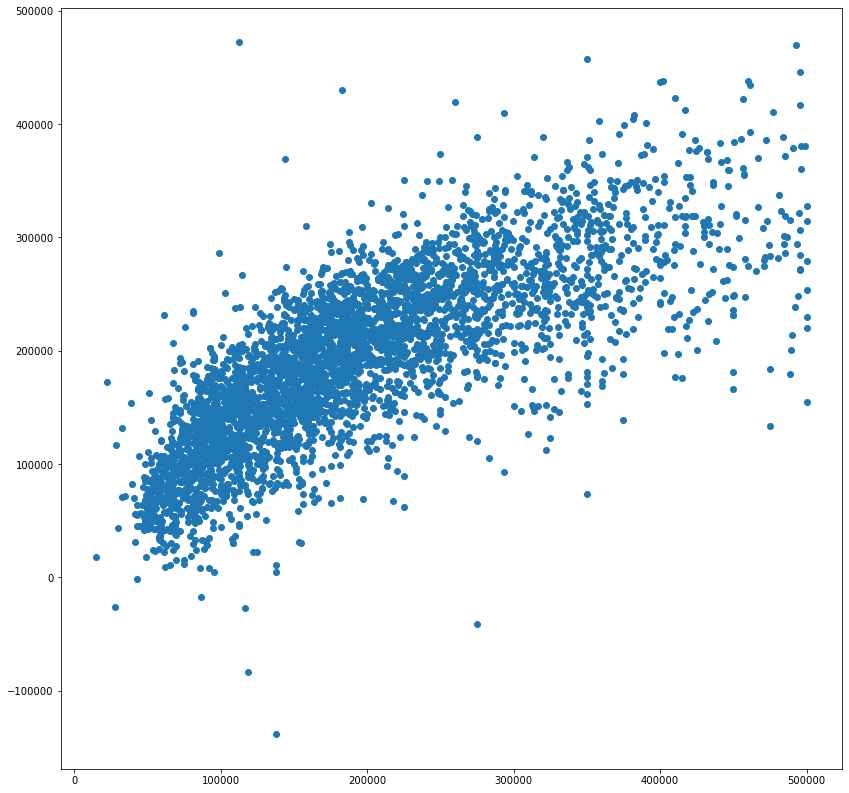

In [57]:
fig, ax = plt.subplots(figsize = (14,14))
plt.scatter(y_test, y_pred)
plt.show()

In [58]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [60]:
df_pred_actual_sample.head()

,index,predicted,actual
0,11255,169649.468386,181800.0
1,16232,200173.548130,113600.0
2,7114,190308.164703,218700.0
3,8450,220667.973309,265000.0
4,3255,95582.193185,56200.0


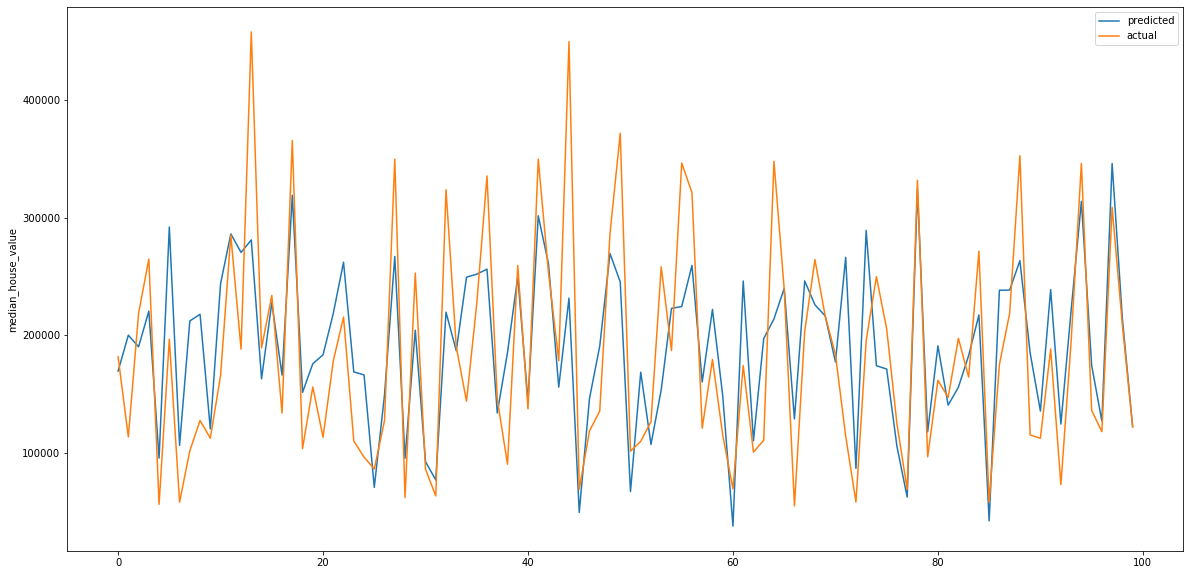

In [62]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label = 'predicted')
plt.plot(df_pred_actual_sample['actual'], label = 'actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()